<img src="coco-logo.png" alt="Image" width="500"/>

# Lecture 4: Data Visualization
*Estimated notebook completion time: 1 hour*

<div>
    <img src="https://matplotlib.org/stable/_static/logo_dark.svg" alt="Matplotlib Logo" width="400" style="display:inline-block;"/>
    <img src="https://seaborn.pydata.org/_images/logo-wide-lightbg.svg" alt="Seaborn Logo" width="350" style="display:inline-block;"/>
</div>


`matplotlib.pyplot` is a Python library that allows us to generate plots from data quickly and with publication quality.
Each pyplot function makes a change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots lines in a plotting area, decorates the plot with labels, changes the colors, etc.

`seaborn` is a Python library for making **statistical** graphics. It builds on top of matplotlib and integrates closely with pandas data structures. It provides a high-level interface for drawing attractive and informative statistical graphics.

In this lesson we will learn about how to use these two libraries to create plots. 
* How to plot a function
* How to import a data file and how can we plot our data? 
* What different kinds plots can I create? 
* Important plotting tips and good practices for high quality graphs
* How can we save our plot for publishing?

### Importing our libraries

One of the easiest ways to make use of `matplotlib` is through the `pyplot` module, into which is usually imported under the alias `plt`. 


In the case of `seaborn`, we will import it under the alias `sns`


We will also be using numpy and pandas to create and import datasets.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd

### Plotting mathematical functions

To graphically visualize a mathematical function that depends on a certain variable, we can create them using `numpy`. 

For example, let's graph the sine function between 0 and 2 $\pi$. 

In [2]:
x = np.linspace(0, 2 * np.pi, 100) # generate 100 evenly spaced values between 0 and 2π 
print(x)

[0.         0.06346652 0.12693304 0.19039955 0.25386607 0.31733259
 0.38079911 0.44426563 0.50773215 0.57119866 0.63466518 0.6981317
 0.76159822 0.82506474 0.88853126 0.95199777 1.01546429 1.07893081
 1.14239733 1.20586385 1.26933037 1.33279688 1.3962634  1.45972992
 1.52319644 1.58666296 1.65012947 1.71359599 1.77706251 1.84052903
 1.90399555 1.96746207 2.03092858 2.0943951  2.15786162 2.22132814
 2.28479466 2.34826118 2.41172769 2.47519421 2.53866073 2.60212725
 2.66559377 2.72906028 2.7925268  2.85599332 2.91945984 2.98292636
 3.04639288 3.10985939 3.17332591 3.23679243 3.30025895 3.36372547
 3.42719199 3.4906585  3.55412502 3.61759154 3.68105806 3.74452458
 3.8079911  3.87145761 3.93492413 3.99839065 4.06185717 4.12532369
 4.1887902  4.25225672 4.31572324 4.37918976 4.44265628 4.5061228
 4.56958931 4.63305583 4.69652235 4.75998887 4.82345539 4.88692191
 4.95038842 5.01385494 5.07732146 5.14078798 5.2042545  5.26772102
 5.33118753 5.39465405 5.45812057 5.52158709 5.58505361 5.648520

We can evaluate the sine function using all the values in x

In [3]:
y = np.sin(x) # compute the sine of each of these values

Now let's try to plot the sine function!

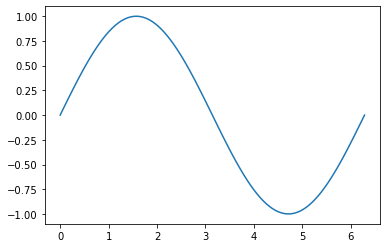

In [4]:
plt.plot(x, y) # x from 0 to 2pi, y = sin(x)
plt.show()

In Matplotlib, `plt.show()` is used to display the plot on the screen. Without calling `plt.show()`, the plot might not be rendered, especially in scripts or non-interactive environments. It ensures that the plot window is opened and the graph is displayed.

The plot we generated has a couple of issues: 

 - *What exactly are we plotting?* 
- *What does each axis represent?* 

These are things that need to be specified in every plot, since they may not be clear to the reader. Let's add the name of the axes and a figure title

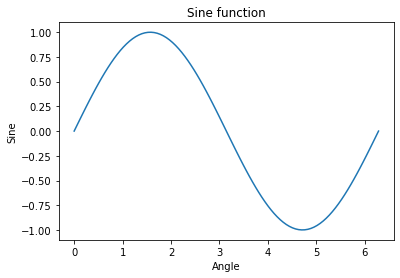

In [5]:
plt.plot(x, y)

# add the name of the axes 
plt.xlabel('Angle')
plt.ylabel('Sine')

# add a title 
plt.title('Sine function')

plt.show()

### Multiple curves in the same plot 

Most of the time we will want to plot several functions or datasets onto the same plot. `plt.plot()` is able to layer different curves simply by calling it repeatedly onto the same graph. 

We can assign each curve with different characteristics, such as `label`, `linestyle` and `color`. This way it's easier to differenciate each of them. To display the labels we need to call `plt.legend()`.

You can check out the different available [linestyles](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html) and [colors](https://matplotlib.org/stable/gallery/color/named_colors.html) in the `matplotlib` [documentation](https://matplotlib.org/stable/). 

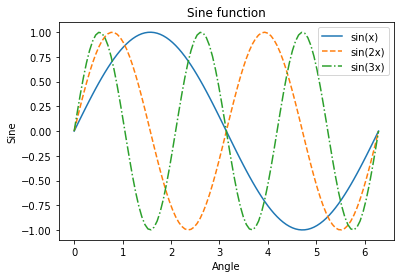

In [6]:
# 1st curve - sin(x)
plt.plot(x, np.sin(x), linestyle="-", label="sin(x)", color="tab:blue")
# 2nd curve - sin(2x)
plt.plot(x, np.sin(2 * x), linestyle="--", label="sin(2x)", color="tab:orange")
# 3th curve - sin(3x)
plt.plot(x, np.sin(3 * x), linestyle="-.", label="sin(3x)", color="tab:green")

# Add the legend 
plt.legend()

# Add the name of x axes 
plt.xlabel('Angle')
# Add the name of y axes 
plt.ylabel('Sine')
# Add a title 
plt.title('Sine function')

plt.show()

### Creating Subplots

Sometimes having all these plots in one single graph may seem overcrowded. 

What we can do to solve this is by creating **subplots**, where we are creating a figure that contains individual plots. For this we can use the pyplot function `subplot`. 

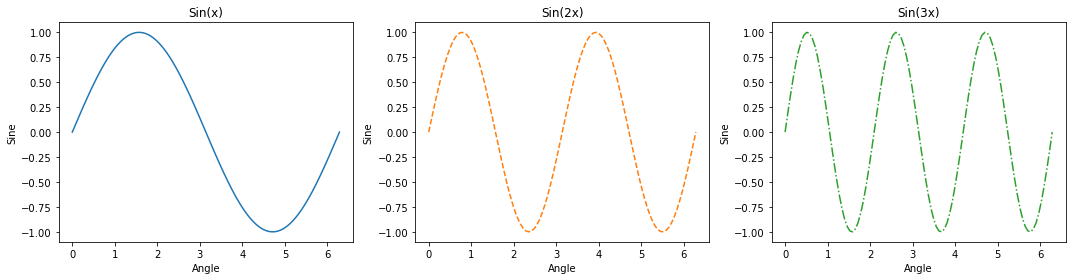

In [7]:
# We want to create a figure with three axis (ax1, ax2 and ax3). 
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,4)) # 1 row, 3 columns, and a size of 15x4 to fit all three plots

# 1st plot on ax1
ax1.plot(x, np.sin(x), linestyle="-", label="sin(x)", color="tab:blue") 
ax1.set_title('Sin(x)')
ax1.set_xlabel('Angle')
ax1.set_ylabel('Sine')

# 2nd plot on ax2
ax2.plot(x, np.sin(2 * x), linestyle="--", label="sin(2x)", color="tab:orange")
ax2.set_title('Sin(2x)')
ax2.set_xlabel('Angle')
ax2.set_ylabel('Sine')

# 3rd plot on ax3
ax3.plot(x, np.sin(3 * x), linestyle="-.", label="sin(3x)", color="tab:green")
ax3.set_title('Sin(3x)')
ax3.set_xlabel('Angle')
ax3.set_ylabel('Sine')

plt.tight_layout() # adjust layout to prevent overlap

# Show the plot
plt.show()

## Plotting Data

In geoscience we usually work with datasets. As an example we will plot the mean temperature of the planet, from 1850 to 2021. It is available on [Berkeley Earth](https://berkeleyearth.org/), but we will easily access a simplified version from out data file: `data/temperature-berkeley.dat`

For this we will import `Path` from `pathlib`, which helps us create a path to files and folders on our computers. Let's define the path to our temperature file:

- By using `Path`, we ensure that this code can work on various operating systems, no matter what type of directory separator they use (`/` or `\`)

In [8]:
from pathlib import Path

berkeley_data = Path('data/temperature-berkeley.dat')
berkeley_data

WindowsPath('data/temperature-berkeley.dat')

Let's use the `numpy.loadtxt` function to read the file

In [9]:
temperature_data = np.loadtxt(berkeley_data)
temperature_data

array([[1850.   ,   13.705],
       [1851.   ,   13.822],
       [1852.   ,   13.828],
       [1853.   ,   13.797],
       [1854.   ,   13.851],
       [1855.   ,   13.87 ],
       [1856.   ,   13.748],
       [1857.   ,   13.608],
       [1858.   ,   13.762],
       [1859.   ,   13.831],
       [1860.   ,   13.748],
       [1861.   ,   13.645],
       [1862.   ,   13.554],
       [1863.   ,   13.78 ],
       [1864.   ,   13.752],
       [1865.   ,   13.866],
       [1866.   ,   13.931],
       [1867.   ,   13.954],
       [1868.   ,   13.934],
       [1869.   ,   13.943],
       [1870.   ,   13.848],
       [1871.   ,   13.827],
       [1872.   ,   13.859],
       [1873.   ,   13.891],
       [1874.   ,   13.833],
       [1875.   ,   13.783],
       [1876.   ,   13.784],
       [1877.   ,   14.164],
       [1878.   ,   14.27 ],
       [1879.   ,   13.919],
       [1880.   ,   13.859],
       [1881.   ,   13.964],
       [1882.   ,   13.901],
       [1883.   ,   13.854],
       [1884. 

We can extract the columns corresponding `years` and temperatures from the array individually

In [10]:
years, temperature = temperature_data[:,0], temperature_data[:,1] # first column is the years, second column is the temperature

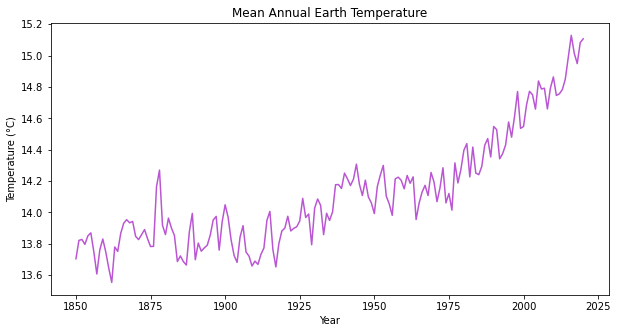

In [11]:
# Plot the data
plt.figure(figsize=(10, 5)) # set the size of the figure
plt.plot(years, temperature, color='mediumorchid')

# Add the name of the axes and title
plt.xlabel('Year') 
plt.ylabel('Temperature (°C)') 
plt.title('Mean Annual Earth Temperature') 
plt.show()


We can now save the plot as a `png` or `jpeg` image. If we wanted to we could also export it as a `pdf` or `svg` (vector image)

We could have also used `seaborn` to make the exact same plot as well, here's how:

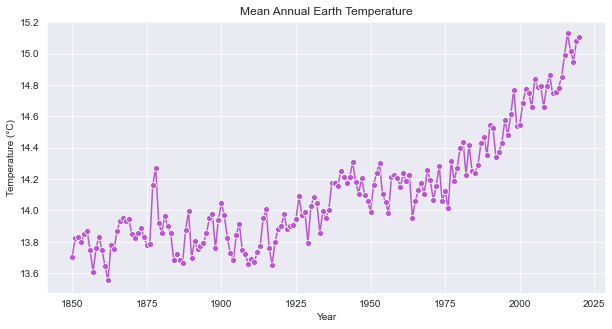

In [12]:
# Plot the data using seaborn
plt.figure(figsize=(10, 5))  # set the size of the figure
sns.set_style("darkgrid")  # set the style of the plot
sns.lineplot(x=years, y=temperature, marker='o', color='mediumorchid')

# Add the name of the axes and title
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Mean Annual Earth Temperature')

# Add a grid
plt.grid(True)

# Save the plot in different formats in the 'plots' folder
plt.savefig('plots/temperature_plot.png', dpi=300)  # save as png with a resolution of 300 dpi
plt.savefig('plots/temperature_plot.pdf')  # save as pdf

plt.show()

By using `sns.set_style()` we can set the color of the background and whether a grid is enabled. For more styles and figure aesthetics, you can check out [this section](https://seaborn.pydata.org/tutorial/aesthetics.html) of the `seaborn` documentation. 

## Different types of plots:
Matplotlib and Seaborn allows us to make multiple types of plots, we will do a couple of examples using both libraries

### Scatter Plot
To demonstrate a scatter plot, let's import one of the default data sets `seaborn` has on its [data repository](https://github.com/mwaskom/seaborn-data). 

Let's load a data set containing information about exoplanets, such as their orbital periods and masses. For this, we can directly import it using `sns.load_dataset()`

In [13]:
planets = sns.load_dataset('planets') # it automatically loads as a dataframe
planets.head() # show the first 5 rows of the dataframe

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


Let's create a scatter plot between orbital period and mass. This is how we would do it using `matplotlib`:

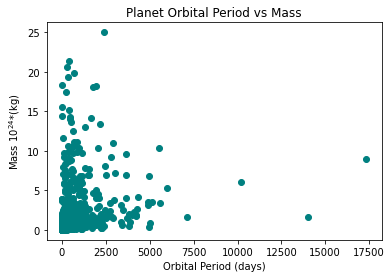

In [14]:
sns.reset_orig() # reset the style of the plots
plt.figure(figsize=(6, 4))  
plt.plot(planets['orbital_period'], planets['mass'], color='teal', marker='o', linestyle='None')

# Add the name of the axes and title
plt.xlabel('Orbital Period (days)') 
plt.ylabel('Mass $10^{24}$*(kg)') # use LaTeX to write the exponent
plt.title('Planet Orbital Period vs Mass') 
plt.show()

There are 7 planets listed in this dataset from 1 to 7. Let's plot each planet characteristics by color. For this we can generate a `colormap` and use a `for loop` to plot all planet numbers. 

For the colormap we will call `plt.cm`, which you can see [here](https://matplotlib.org/stable/api/cm_api.html). It allows us to import built in colormaps. In this example we will use `viridis`, a pretty common colormap in geoscience. You can check the `matplotlib` [documentation](https://matplotlib.org/stable/users/explain/colors/colormaps.html) for other examples.

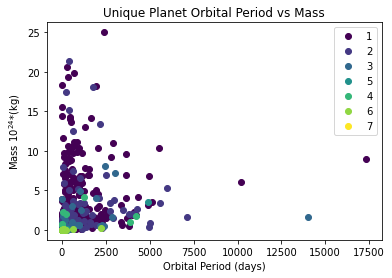

In [15]:
plt.figure(figsize=(6, 4))

# Generate a color map
planet_numbers = planets['number'].unique() # get the unique values of the column 'number': 1 to 7
colors = plt.cm.viridis(np.linspace(0, 1, len(planet_numbers))) # generate a color map with the same length as unique_planets

# Plot each planet with a different color
for i, planet in enumerate(planet_numbers):
    planet_data = planets[planets['number'] == planet] # get the data of an individual planet. 
    # planet_data is being set by making sure that the number column is equal to the planet number
    plt.plot(planet_data['orbital_period'], planet_data['mass'], color=colors[i], 
            marker='o', linestyle='None', label= planet) 

# Add the name of the axes and title
plt.xlabel('Orbital Period (days)')
plt.ylabel('Mass $10^{24}$*(kg)')  # Use LaTeX to write the exponent
plt.title('Unique Planet Orbital Period vs Mass')
plt.legend()
plt.show()

There are a lot of steps to doing this in `matplotlib` and can get complicated pretty quick. Luckily, `seaborn` can create these colormaps automatically by using the `hue` argument in the `sns.scatterplot()` function. 

Instead of a color map, `seaborn` works with `palettes`, which you can specify as an argument when plotting the data. For more information on the `color palettes` you can check the [documentation here](https://seaborn.pydata.org/tutorial/color_palettes.html). You can also assign a different marker by adding the `style` argument.

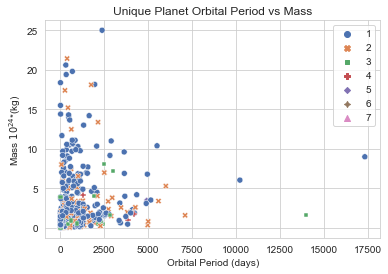

In [16]:
plt.figure(figsize=(6, 4))
sns.set_style("whitegrid")  
sns.scatterplot(data=planets, x="orbital_period", y="mass", hue="number", palette='deep', style="number")

plt.xlabel('Orbital Period (days)')
plt.ylabel('Mass $10^{24}$*(kg)')  # Use LaTeX to write the exponent
plt.title('Unique Planet Orbital Period vs Mass')
plt.legend()
plt.show()

You can also categorize each planet number by the marker size. Here's an example where we use `size` to differenciate between planet numbers.

Additionally, if we want to modify the limits in the X or Y axis, we can do it with `plt.xlim` and `plt.ylim` respectively. 

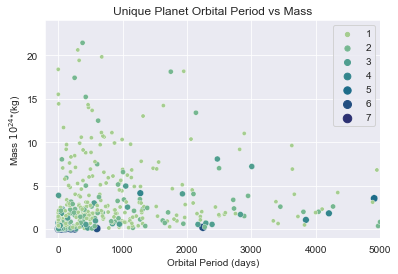

In [17]:
plt.figure(figsize=(6, 4))
sns.set_style("darkgrid")  
sns.scatterplot(data=planets, x="orbital_period", y="mass", hue="number", palette='crest', size="number")

plt.xlabel('Orbital Period (days)')
plt.ylabel('Mass $10^{24}$*(kg)')  # Use LaTeX to write the exponent
plt.title('Unique Planet Orbital Period vs Mass')

plt.xlim(-200, 5000)  # set the x-axis limits
plt.ylim(-1, 24)  # set the y-axis limits

plt.legend()
plt.savefig('plots/planet_orbital_period_vs_mass.png', dpi=300)  
plt.show()

### Pie Chart

Also known as a **circle chart**. The function to plot these in `matplotlib` is `plt.pie()`. The documentation and other examples on this function can be found [here](https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py). There is no pie chart function in `seaborn`.

Let's create a `pie chart` representing the different methods used to obtain the planets data. For this, we need to know how many measurements exist by each method and we will group all methods that have less than 10 counts.

In [18]:
# Count how many measurements per each method
method_counts = planets['method'].value_counts() 
method_counts

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

In [19]:
# Identify methods with fewer than 10 counts
low_count_methods = method_counts[method_counts < 10]
other_count = low_count_methods.sum()

# Filter out methods with fewer than 10 counts (other)
filtered_method_counts = method_counts[method_counts >= 10]

# Add the "Other" category
filtered_method_counts['Other'] = other_count
filtered_method_counts

Radial Velocity    553
Transit            397
Imaging             38
Microlensing        23
Other               24
Name: method, dtype: int64

Now we can go ahead and plot! 

The `autopct` argument will add the percentages of the respective slices, `startangle` is the angle where the first slice will begin and `color` is used to chose what individual colors or colormap you want for your pie chart.

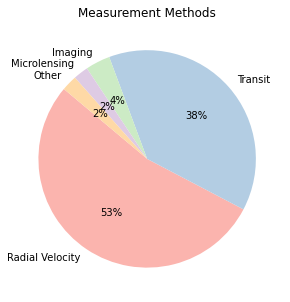

In [28]:
data = filtered_method_counts.values # get the values of the method_counts series
labels = filtered_method_counts.index # the index corresponds to the method names

sns.reset_orig() # reset the style of the plots
plt.figure(figsize=(10, 5))
plt.pie(data, labels=labels, autopct='%.0f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.title('Measurement Methods')
plt.savefig('plots/method_pie_chart.png', dpi=300)
plt.show()

### Histogram

Histograms are plots that represent the distribution of numeric values as a series of bars, which are grouped by `bins`. A bar's height indicates the frequency of values within the a given bin. Both `matplotlib` and `seaborn` can create histograms.

The `matplotlib` function for this is `plt.hist()`, where you need to specify the array of data it will plot. You can also specify how many `bins` it will group them in and whether it is a `density function` (so that the area under the histogram integrated to 1). More information on the `plt.hist()` function can be found in the [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)

Let's plot a histogram of the duration of geyser explosions!

In [21]:
geyser = sns.load_dataset('geyser') 
geyser.head()

,duration,waiting,kind
0,3.600,79,long
1,1.800,54,short
2,3.333,74,long
3,2.283,62,short
4,4.533,85,long


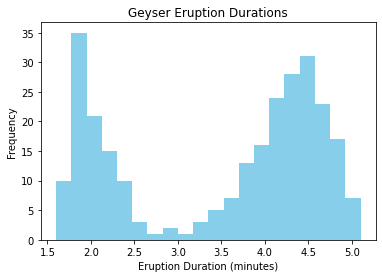

In [22]:
sns.reset_orig() # reset the style of the plots
plt.figure(figsize=(6, 4))

plt.hist(geyser['duration'], bins=20, density=False, color='skyblue') # plot the histogram

plt.xlabel('Eruption Duration (minutes)')
plt.ylabel('Frequency')  
plt.title('Geyser Eruption Durations') 
plt.show()

For `seaborn` the function is `sns.histplot()`, where you can additionally specify if you want the bars to be on the `X` or `Y` axis, add a kernel density estimate (kde) or draw multiple histograms with `hue` mapping. To see other arguments you can check the documentation [here](https://seaborn.pydata.org/generated/seaborn.histplot.html).

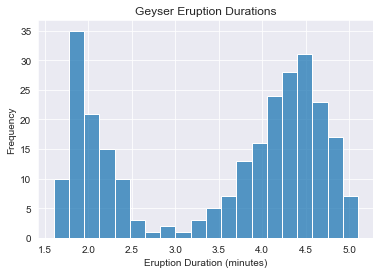

In [23]:
plt.figure(figsize=(6, 4))
sns.set_style("darkgrid")
sns.histplot(data=geyser, x='duration', bins=20, kde=False)

plt.xlabel('Eruption Duration (minutes)')
plt.ylabel('Frequency')  
plt.title('Geyser Eruption Durations') 
plt.show()

Let's plot the distributions of both *long* and *short* eruptions as well as the KDE for both:

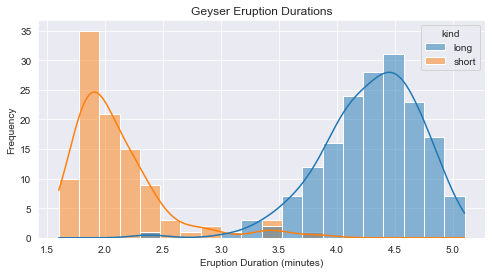

In [24]:
plt.figure(figsize=(8, 4))
sns.set_style("darkgrid")
sns.histplot(data=geyser, x='duration', bins=20, kde=True, hue='kind')

plt.xlabel('Eruption Duration (minutes)')
plt.ylabel('Frequency')  
plt.title('Geyser Eruption Durations') 
plt.savefig('plots/geyser_eruption_durations.png', dpi=300) 
plt.show()

### Bar Plots

These kinds of plots are may seem similar to histograms, but the difference between them is that **bar plots compare discrete or categorical variables**, whereas the histogram depicts the frequency distribution of variables in a dataset

For `matplotlib` the function is `plt.bar`, which you can find more information about [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html). 

Let's make a `bar plot` that will shows the average eruption *duration* of each *kind* of geyser

In [25]:
# First we need to calculate the mean duration of long and short eruptions
long_average = geyser[geyser['kind'] == 'long']['duration'].mean() # mean duration of long eruptions
short_average = geyser[geyser['kind'] == 'short']['duration'].mean() # mean duration of short eruptions
print(short_average, long_average)

# Let's add them to a dataframe
average_duration = pd.DataFrame({'kind': ['long', 'short'], 'duration': [long_average, short_average]})
average_duration

2.09433 4.297930232558141


,kind,duration
0,long,4.29793
1,short,2.09433


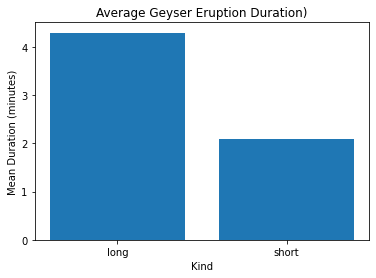

In [26]:
sns.reset_orig() # reset the style of the plots
plt.figure(figsize=(6, 4))
plt.bar(average_duration['kind'], average_duration['duration'])
plt.xlabel('Kind')
plt.ylabel('Mean Duration (minutes)')
plt.title('Average Geyser Eruption Duration)')
plt.show()

To obtain the average duration times, we had to calculate them ourselves and **then** add them to the plot. One benefit of `seaborn` is that it groups the data by the kind column and calculates the `mean` (or another estimator if specified) of the duration column for each group. 

So to plot the average duration of geyser eruption kinds, we can do it directly using the `sns.barplot` function, which you can find more information about [here](https://seaborn.pydata.org/generated/seaborn.barplot.html)

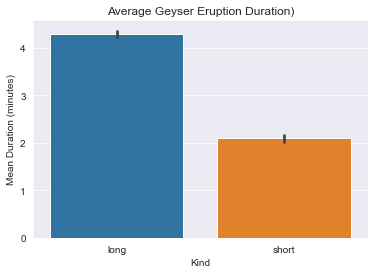

In [30]:
sns.set_style("darkgrid")
sns.barplot(data=geyser, x="kind", y="duration")
plt.xlabel('Kind')
plt.ylabel('Mean Duration (minutes)')
plt.title('Average Geyser Eruption Duration)')
plt.savefig('plots/geyser_eruption_duration_barplot.png', dpi=300)
plt.show()

### Box Plot

A box plot, also known as a `box-and-whisker plot`, is a graph that shows the distribution of numerical data using a box and lines. It's a useful tool for summarizing data and comparing different sets of data. If you haven't seen one before, this is how they are interpreted: 

<img src="box_plot.JPG" alt="Image" width="500"/>


Let's go back to our average air temperature data from [Berkeley Earth](https://berkeleyearth.org/) and create a `box plot` of the distribution of all the temperatures from 1850 to 2020. 

For `matplotlib` we would use the `plt.boxplot` function, which you can find more information about [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html).

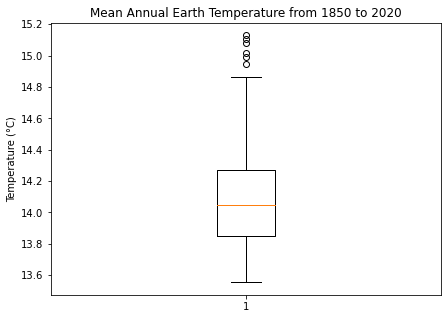

In [81]:
sns.reset_orig() # reset the style of the plots
plt.figure(figsize=(7, 5))
plt.boxplot(temperature)
plt.ylabel('Temperature (°C)')
plt.title('Mean Annual Earth Temperature from 1850 to 2020')
plt.show()

Beyond the whiskers there are some data points that appear as **dots**. These dots are considered `outliers`. In a box plot, `outliers` are data points that fall outside the range defined by the whiskers. For `matplotlib` the whiskers extend to 1.5 times the interquartile range (IQR) from the first and third quartiles. Any data points beyond this range are considered `outliers` and are plotted as individual dots.

However, since we are plotting such a wide range of years and temperatures, putting them all in a single box plot is not representative, especially if we want to see some kind of trend in time. 

Let's create boxplots for temperatures **every 10 years** (group from 1850 to 1859, 1860 to 1869... and 2010 to 2019), where each decade is its own boxplot.

In [54]:
# Converting the data to a DataFrame
temperature_data = pd.DataFrame(temperature_data, columns=['Year', 'Temperature'])
# Convert the 'Year' column to integers
temperature_data['Year'] = temperature_data['Year'].astype(int) # no decimals in years
# Create a new column for the ten-year groups 
temperature_data['Decade'] = (temperature_data['Year'] // 10) * 10 # round down each year to the nearest decade.
temperature_data.head(11)

,Year,Temperature,Decade
0,1850,13.705,1850
1,1851,13.822,1850
2,1852,13.828,1850
3,1853,13.797,1850
4,1854,13.851,1850
5,1855,13.870,1850
6,1856,13.748,1850
7,1857,13.608,1850
8,1858,13.762,1850
9,1859,13.831,1850


`matplotlib` struggles creating boxplots by handling the grouping and plotting of the data internally, so we need to group it ourselves: 

In [91]:
# Group the data by Decade
grouped_temperatures = temperature_data.groupby('Decade')['Temperature'].apply(list)
grouped_temperatures

Decade
1850    [13.705, 13.822, 13.828, 13.796999999999999, 1...
1860    [13.748, 13.645, 13.553999999999998, 13.78, 13...
1870    [13.847999999999999, 13.827, 13.859, 13.891, 1...
1880    [13.859, 13.963999999999999, 13.901, 13.854, 1...
1890    [13.699, 13.805, 13.753, 13.774, 13.7909999999...
1900    [14.049, 13.969, 13.825999999999999, 13.725999...
1910    [13.69, 13.668999999999999, 13.732999999999999...
1920    [13.899999999999999, 13.975999999999999, 13.88...
1930    [14.027999999999999, 14.085999999999999, 14.04...
1940    [14.251, 14.213999999999999, 14.17199999999999...
1950    [13.992999999999999, 14.165, 14.238, 14.299999...
1960    [14.151, 14.235999999999999, 14.186, 14.226999...
1970    [14.193999999999999, 14.068999999999999, 14.15...
1980    [14.395999999999999, 14.439, 14.22699999999999...
1990    [14.548, 14.527999999999999, 14.34199999999999...
2000    [14.548, 14.684999999999999, 14.77199999999999...
2010    [14.863999999999999, 14.745999999999999, 14.75...
2020   

Now we can use the `plt.boxplot` function from `matplotlib` to create our plot:

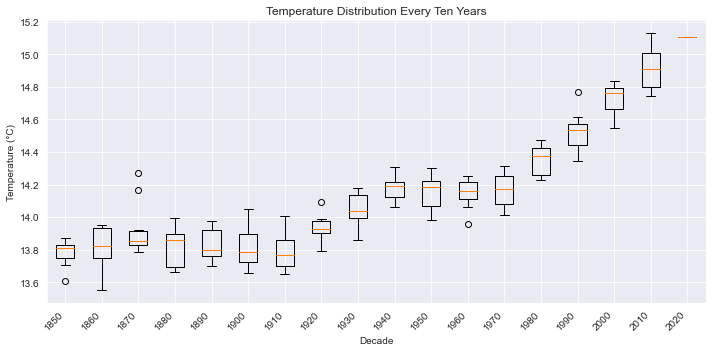

In [103]:
plt.figure(figsize=(10, 5))
plt.boxplot(grouped_temperatures, labels=grouped_temperatures.index) # the index is the decade label
plt.title('Temperature Distribution Every Ten Years')
plt.xlabel('Decade')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

This plot is much more representative of the variation of temperature in time, as well as how each decade distribution changes! 

If we wanted to avoid manually grouping the temperatures, `seaborn` is capable of grouping them internally and creating boxplots using the `sns.boxplot` function. You can find more information about it [here](https://seaborn.pydata.org/generated/seaborn.boxplot.html). Let's go ahead and create the same plot we did above:

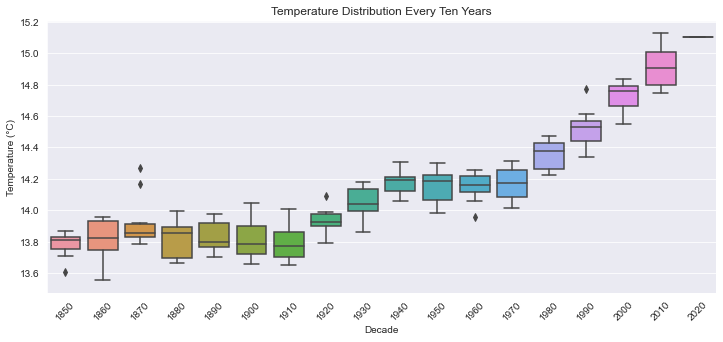

In [102]:
plt.figure(figsize=(12, 5))
sns.set_style("darkgrid")
sns.boxplot(data=temperature_data, x='Group', y='Temperature')
plt.xlabel('Decade')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Distribution Every Ten Years')
plt.xticks(rotation=45)
plt.savefig('plots/temperature_boxplot.png', dpi=300)
plt.show()

### Violin Plot

Similar to the `box plot`, the `violin plot` shows the distribution of numerical data using **density curves**. It's a useful tool for visualizing and comparing distributions between groups, and identifying peaks, valleys, and tails in the data. 

Let's create `violin plots` of the temperature data we plotted earlier. 

In `matplotlib` we use `plt.violinplot`, where you can specify whether or not you want to display the `mean` or `median` of each distribution. The input parameters are different than for `plt.boxplot`, and we are not able to plot the labels directly in the function. You can find more information about this function and its arguments [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.violinplot.html).


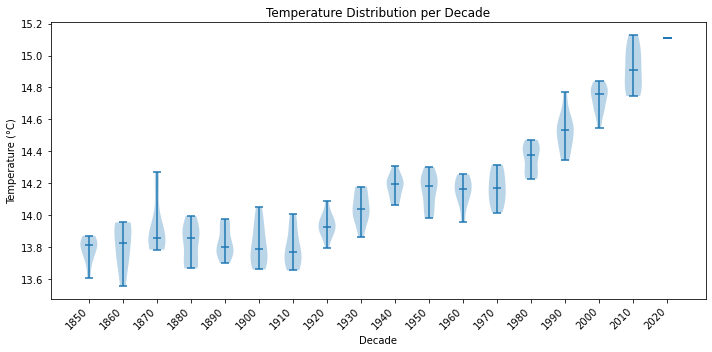

In [105]:
sns.reset_orig() # reset the style of the plots
plt.figure(figsize=(10, 5))
plt.violinplot(grouped_temperatures, showmedians=True, showmeans=False) # show the median, but not the mean
plt.title('Temperature Distribution per Decade')
plt.xlabel('Decade')
plt.ylabel('Temperature (°C)')
plt.xticks(ticks=range(1, len(grouped_temperatures.index) + 1), labels=grouped_temperatures.index, # the ticks are the decades (index)
            rotation=45, ha='right')
plt.tight_layout()
plt.show()

In `seaborn` the function we use is `sns.violinplot`, which has considerably more arguments than in `matplotlib`. One advantage this function also has 

### Heat Maps

### Rasterio ** pending